In [8]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
import random


In [3]:
# 1. 데이터셋
from keras.datasets import mnist
from keras.utils import to_categorical
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


In [4]:
print(X_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

(10000, 28, 28, 1)


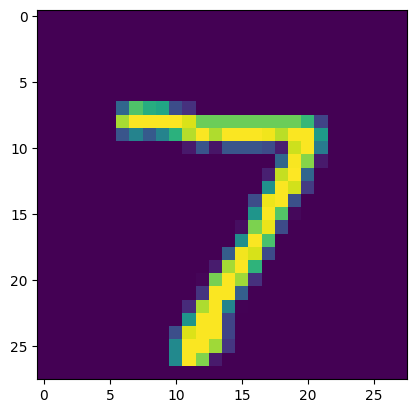

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [5]:
print(X_test.shape)

import matplotlib.pyplot as plt
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])
print(to_categorical(Y_test)[0])

In [9]:
# 2. 모델 구성
model = Sequential()
model.add( Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)) )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Flatten() )
model.add( Dense(units=10, activation='softmax') )

ValueError: Unrecognized keyword arguments passed to Conv2D: {'input_size': (28, 28, 1)}

In [16]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 3. 학습설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [18]:
# 4. 학습
history = model.fit(X_train, Y_train, epochs=50, batch_size=16)


Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - accuracy: 0.8771 - loss: 0.4363
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 875us/step - accuracy: 0.9598 - loss: 0.1348
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.9716 - loss: 0.0893
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 890us/step - accuracy: 0.9769 - loss: 0.0731
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 897us/step - accuracy: 0.9829 - loss: 0.0565
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 884us/step - accuracy: 0.9844 - loss: 0.0473
Epoch 7/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 916us/step - accuracy: 0.9883 - loss: 0.0378
Epoch 8/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.9896 - loss: 0.0333
Epoch 9/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 894us/step - accuracy: 0.9912 - loss: 0.0290
Epoch 10/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 3s 916us/step - accuracy: 0.9916 - loss: 0.0265
Epoch 11/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 4s 937us/step - accuracy: 0.9939 - loss: 0.0200
Epoch 12

In [19]:
# 6. 평가
scores = model.evaluate(X_test, Y_test)
print("acc: %f" %(scores[1]*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9692 - loss: 0.2666
acc: 97.229999


In [24]:
y_pred = model.predict(X_test)
print(y_pred[0])
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
[1.2361683e-24 0.0000000e+00 3.3471923e-16 1.3456678e-15 3.4173673e-38
 4.0857381e-28 0.0000000e+00 1.0000000e+00 2.3900538e-21 1.7996549e-19]
7


In [25]:
model.save('my.h5')